<a href="https://colab.research.google.com/github/rohanguptha/INFO5731/blob/master/bompally_selfstudy12_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!wget https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv

--2019-04-23 07:35:32--  https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘customer_churn.csv.2’

customer_churn.csv. 100%[===================>] 668.81K  --.-KB/s    in 0.08s   

2019-04-23 07:35:32 (8.61 MB/s) - ‘customer_churn.csv.2’ saved [684858/684858]



In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("customer_churn.csv")

In [219]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**The bar plot depicts size of '0' and '1' are not equal. So to build a model we need equal count of 0's and 1's.
**

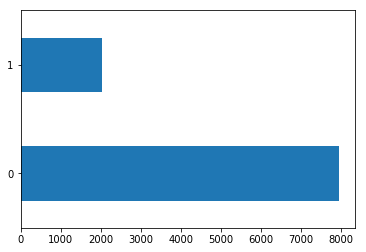

In [220]:
df['Exited'].value_counts().plot(kind='barh')

In [0]:
exited_one = df[df['Exited']==1]

In [222]:
len(df[df['Exited']==1])

2037

In [0]:
exited_zero = df[df['Exited']==0].sample(n = 2037, random_state = 1)

In [0]:
df = exited_one.append(exited_zero, ignore_index=True)

In [225]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
3,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
4,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [226]:
len(df)

4074

In [0]:
df = df.drop(['RowNumber'], axis=1)

In [228]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
3,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
4,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


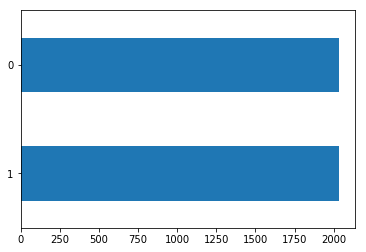

In [229]:
df['Exited'].value_counts().plot('barh')

Now, we can build a model as the number of 0's and 1's are equal

In [0]:
!pip install -q tensorflow==2.0.0-alpha0

**We need to scale the data before fitting a model.**

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[numeric_columns] = sc.fit_transform(df[numeric_columns])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [184]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,-0.299088,France,Female,0.082245,-1.000469,-1.330588,-0.762480,1,1,0.022512,1
1,15619304,Onio,-1.494885,France,Female,0.082245,1.068871,1.257991,2.207257,1,0,0.241231,1
2,15574012,Chu,-0.033356,Spain,Male,0.270009,1.068871,0.513733,0.722388,1,0,0.863962,1
3,15656148,Obinna,-2.782667,Germany,Female,-1.138223,-0.310689,0.534664,3.692125,1,0,0.335363,1
4,15737452,Romeo,0.048408,Germany,Male,1.584360,-1.345359,0.819301,-0.762480,1,0,-1.650575,1


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [188]:
len(train)

3259

In [189]:
len(test)

815

In [0]:
train, valid = train_test_split(train, test_size=0.2, random_state=1)

In [191]:
len(train)

2607

In [192]:
len(valid)

652

In [193]:
valid.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3683,15677908,Gilbert,-0.983861,Spain,Male,0.082245,-0.310689,-1.330588,0.722388,0,0,1.662438,0
2112,15664311,Yang,-0.115120,Germany,Male,-1.232106,-0.655579,0.674565,-0.762480,1,1,1.154279,0
3746,15693200,King,1.060236,France,Female,-0.481048,0.723981,-1.330588,0.722388,1,0,1.474264,0
619,15591915,Frolov,-1.178050,France,Female,-0.199402,-1.000469,-1.330588,-0.762480,0,1,-0.458617,1
618,15690188,Maclean,-0.176443,France,Male,-0.762695,0.723981,-1.330588,-0.762480,1,1,-0.730252,1


In [0]:
from tensorflow import feature_column

In [0]:
tf.random.set_seed(1)

In [196]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_columns = ['Geography',
       'Gender', 'HasCrCard',
       'IsActiveMember']

In [0]:
feature_columns = []

In [0]:
for header in numeric_columns:
  feature_columns.append(feature_column.numeric_column(header))

In [200]:
feature_columns

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NumOfProducts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [0]:
def get_one_hot_rom_categorical(colname):
  categorical = feature_column.categorical_column_with_vocabulary_list(
  colname,
  train[colname].unique().tolist())
  return feature_column.indicator_column(categorical)

In [0]:
# train["Geography"].unique().tolist()

In [203]:
get_one_hot_rom_categorical("Geography")

IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('Germany', 'France', 'Spain'), dtype=tf.string, default_value=-1, num_oov_buckets=0))

In [0]:
for col in categorical_columns:
  feature_columns.append(get_one_hot_rom_categorical(col))

In [205]:
feature_columns

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NumOfProducts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('Germany', 'France', 'Spain'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Gender', vocabulary_list=('Male', 'Female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(c

In [0]:
from tensorflow.keras import layers

In [0]:
feature_layer = layers.DenseFeatures(feature_columns)

In [208]:
feature_layer

In [0]:
model = keras.Sequential()
model.add(feature_layer)
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
def df_to_tfdata(df, shuffle=True, bs=32):
  df = df.copy()
  labels = df.pop('Exited')
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df), seed=1)
  ds = ds.batch(bs)
  return ds

In [0]:
train_ds = df_to_tfdata(train)

In [0]:
valid_ds = df_to_tfdata(valid, shuffle=False)
test_ds = df_to_tfdata(test, shuffle=False)

In [214]:
model.fit(train_ds,
         validation_data = valid_ds,
         epochs=5)

Epoch 1/5
82/82 [==============================] - 2s 24ms/step - loss: 0.5779 - accuracy: 0.6736 - val_loss: 0.5460 - val_accuracy: 0.7316
Epoch 2/5
82/82 [==============================] - 2s 22ms/step - loss: 0.5035 - accuracy: 0.7394 - val_loss: 0.5063 - val_accuracy: 0.7669
Epoch 3/5
82/82 [==============================] - 2s 23ms/step - loss: 0.4712 - accuracy: 0.7720 - val_loss: 0.4920 - val_accuracy: 0.7684
Epoch 4/5
82/82 [==============================] - 2s 21ms/step - loss: 0.4572 - accuracy: 0.7814 - val_loss: 0.4878 - val_accuracy: 0.7730
Epoch 5/5
82/82 [==============================] - 2s 20ms/step - loss: 0.4478 - accuracy: 0.7869 - val_loss: 0.4858 - val_accuracy: 0.7776


In [215]:
model.evaluate(test_ds)

26/26 [==============================] - 0s 12ms/step - loss: 0.4816 - accuracy: 0.7546


[0.48164162269005406, 0.75460124]